In [1]:
import torch
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from model import KMeans

In [2]:
# make data

# init 6 classes
X, y = make_classification(n_samples = 10_000, n_features = 10, n_classes = 6, n_informative = 6)

In [3]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# to tensor 

X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype = torch.int32).unsqueeze(1)

In [5]:
# init model and fit 

K = 6 # classes 
kmeans = KMeans(K = K, EPOCHS=10)
kmeans.fit(X_train)

/Volumes/Transcend/projects/algorithms-implementations/KMeans/model.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centroids[torch.tensor(c, dtype = torch.long)] = new_centroid


In [6]:
# predict 

preds = kmeans.predict(X_test)

In [7]:
preds

tensor([[0.],
        [3.],
        [0.],
        ...,
        [2.],
        [1.],
        [1.]])

### Testing Model 

Use data visualisation to test the model. How it is done:

- Compress the fake data into 2 dimensions using PCA -> for **scatter plot** visualisation.
- Plot the compressed features, colouring each dot with its related cluster assignment label. 

In [16]:
# import libraries 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
# perform PCA 

pca = PCA(n_components=2)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)

PCA(n_components=2)

In [12]:
# explained ratios for the two features

pca.explained_variance_ratio_

array([0.48976734, 0.17331803])

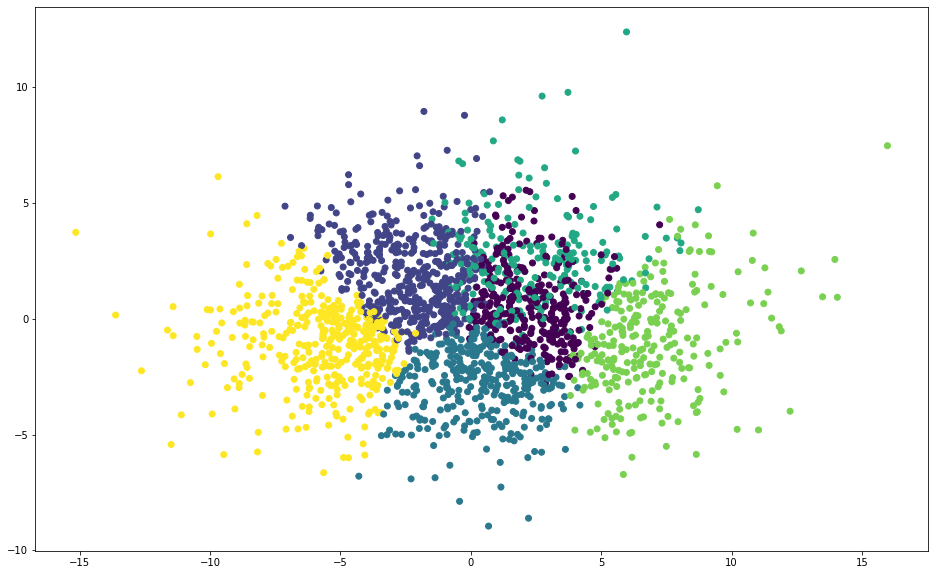

In [22]:
# plot all 

plt.figure(figsize = (16, 10))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = preds)

### Findings:

- Generally, we can see that data is quite well partioned. 
- 4 clusters do not overlap.
- 2 clusters overlap -> this is expected because of data compression.